In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil

from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

I define my CNN model: I use 4 2D pooling layers, 2 dropout layers with a dense network at the end.

In [4]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
   

Model Summary.

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)      

Compile my model.

In [20]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (40, 150, 150, 3)
labels batch shape: (40,)


I did all my augmentation in roboflow so now I create the image data generators to preprocess and resize the images to 150X150.

In [26]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        './pics/train',
        #'./roboModels/version11train.v1-version11_train.folder/train',
        classes=['pit','notPit'],
    
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        './pics/test',
        classes=['pit','notPit'],
        
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 1482 images belonging to 2 classes.
Found 358 images belonging to 2 classes.


Now I am going to fit my model with 10 epochs.

In [27]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=int(1482/20),
      epochs=10,
      validation_data=test_generator,
      validation_steps=358/20)

Epoch 1/10
74/74 [==============================] - 56s 763ms/step - loss: 0.6557 - accuracy: 0.7408 - val_loss: 0.6664 - val_accuracy: 0.6816
Epoch 2/10
74/74 [==============================] - 62s 844ms/step - loss: 0.6461 - accuracy: 0.7620 - val_loss: 0.6595 - val_accuracy: 0.7179
Epoch 3/10
74/74 [==============================] - 58s 781ms/step - loss: 0.6321 - accuracy: 0.7722 - val_loss: 0.6492 - val_accuracy: 0.7179
Epoch 4/10
74/74 [==============================] - 58s 781ms/step - loss: 0.6188 - accuracy: 0.7572 - val_loss: 0.6365 - val_accuracy: 0.7346
Epoch 5/10
74/74 [==============================] - 57s 774ms/step - loss: 0.6008 - accuracy: 0.7627 - val_loss: 0.6198 - val_accuracy: 0.7374
Epoch 6/10
74/74 [==============================] - 55s 747ms/step - loss: 0.5640 - accuracy: 0.7777 - val_loss: 0.5964 - val_accuracy: 0.7235
Epoch 7/10
74/74 [==============================] - 59s 791ms/step - loss: 0.5387 - accuracy: 0.7880 - val_loss: 0.5763 - val_accuracy: 0.7291

In [29]:
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=90)
print('test accuracy', test_accuracy)

test accuracy 0.7290502786636353


I plot the results

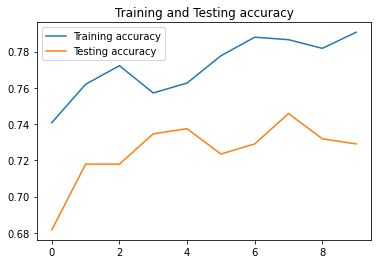

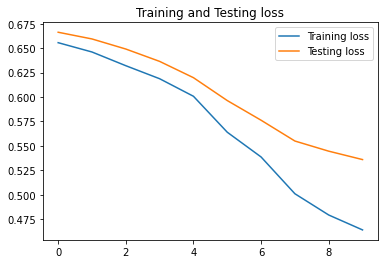

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Testing loss')
plt.title('Training and Testing loss')
plt.legend()

plt.show()


In [ ]:
model.save('./roboModels/version6.v1.folder/final_model')

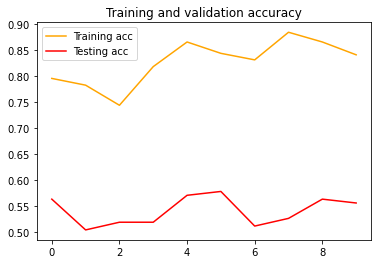

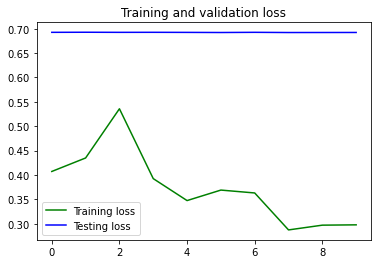

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc', color='orange')
plt.plot(epochs, val_acc, label='Testing acc', color='red')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss', color='green')
plt.plot(epochs, val_loss, label='Testing loss', color='blue')
plt.title('Training and validation loss')
plt.legend()

plt.show()